In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [3]:
# Reading whale returns
whale_returns_csv = Path("../Instructions/Starter_Code/Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
whale_returns.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [4]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna(inplace = True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Reading algorithmic returns
# algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns_csv = Path("../Instructions/Starter_Code/Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns.head()

Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [7]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace = True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# Reading S&P 500 Closing Prices
# sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history_csv = Path("../Instructions/Starter_Code/Resources/sp500_history.csv")
sp500 = pd.read_csv(sp500_history_csv, index_col = "Date", parse_dates = True, infer_datetime_format = True)
sp500.head()

Close
Date                
2019-04-23  $2933.68
2019-04-22  $2907.97
2019-04-18  $2905.03
2019-04-17  $2900.45
2019-04-16  $2907.06

In [10]:
# Check Data Types
# YOUR CODE HERE
sp500.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
# YOUR CODE HERE
sp500["Close"] = sp500["Close"].str.replace("$", "").astype(float)
sp500.dtypes

Close    float64
dtype: object

In [12]:
sp500.sort_index(inplace = True)
sp500.head()

Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93

In [13]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_pct = sp500.pct_change().dropna()
sp500_pct.head()

Close
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [14]:
# Rename Column
# YOUR CODE HERE
sp500_pct.columns = ["S&P 500"]
sp500_pct.head()

S&P 500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

In [15]:
# Drop nulls
# YOUR CODE HERE
sp500_pct.dropna(inplace = True)

In [16]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
combined = pd.concat([whale_returns, algo_returns, sp500_pct], axis = "columns", join = "inner")
combined.head()

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

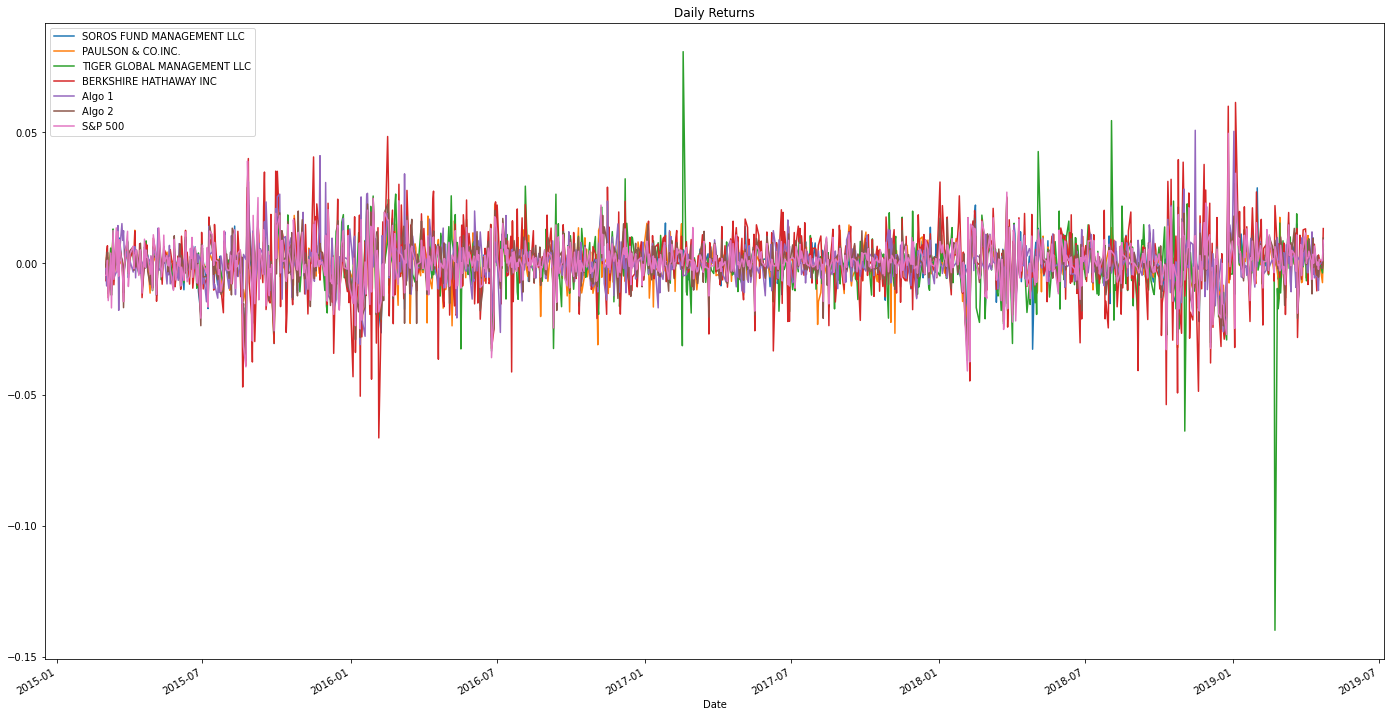

In [17]:
# Plot daily returns
# YOUR CODE HERE
combined.plot(figsize = (24,13), title = "Daily Returns")

In [18]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + combined).cumprod()

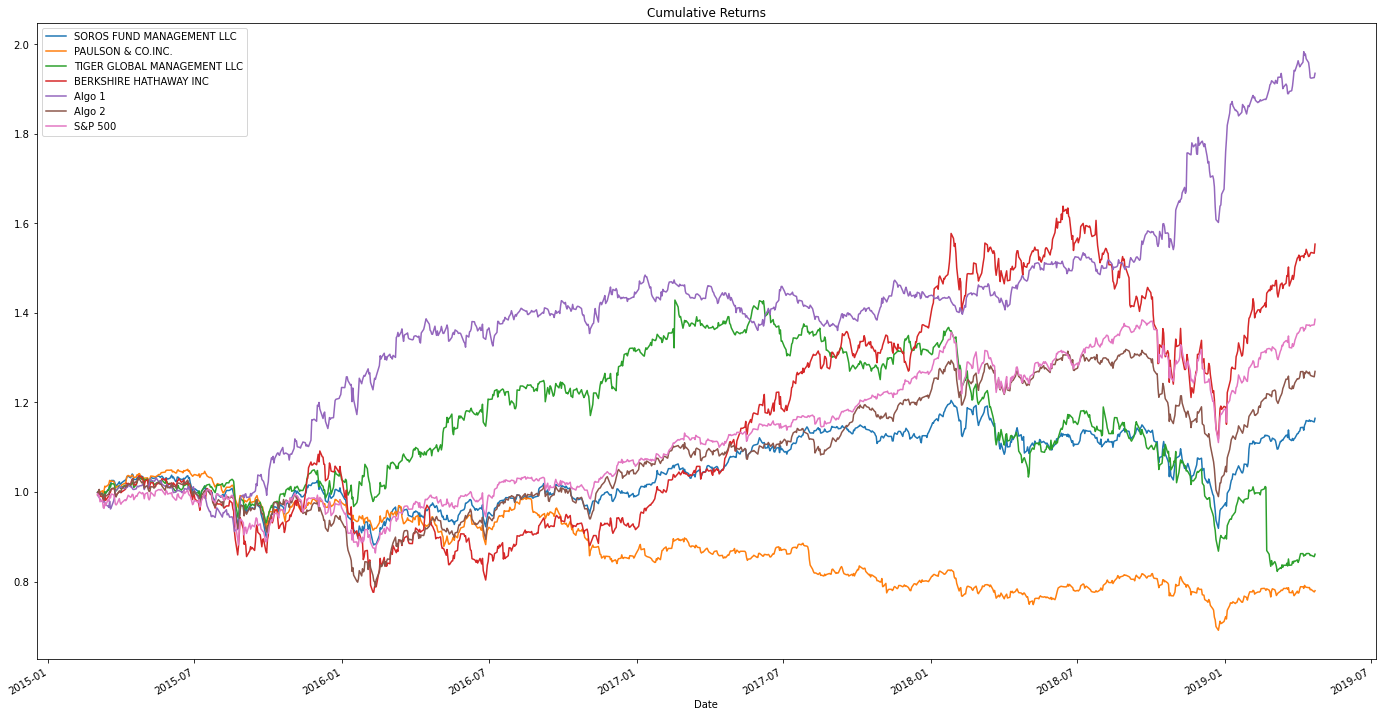

In [19]:
cumulative_returns.plot(figsize = (24,13), title = "Cumulative Returns")

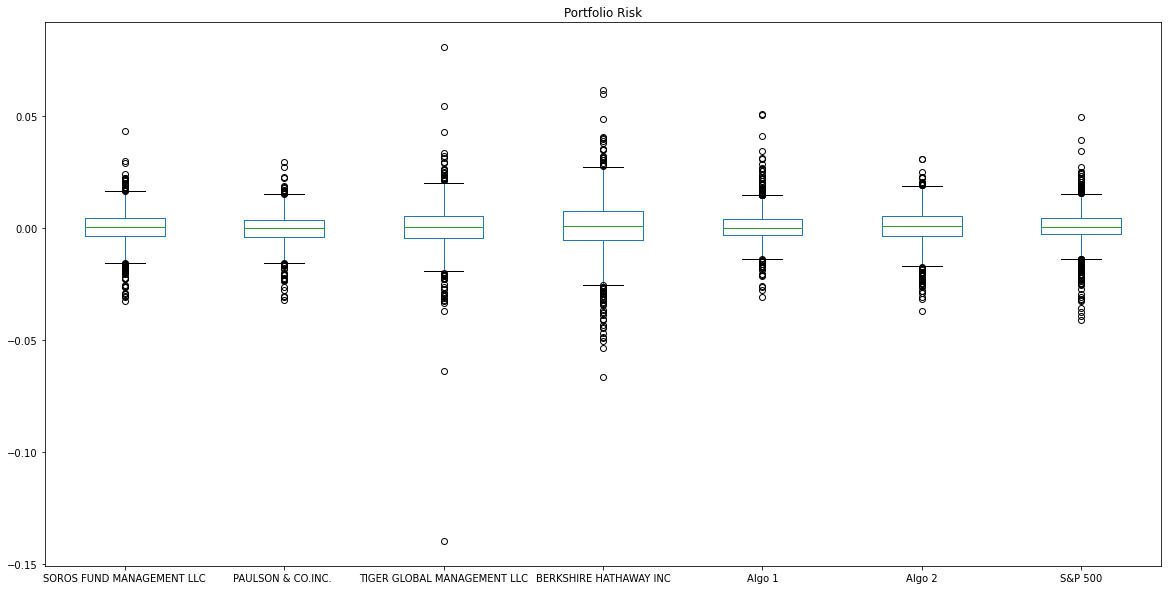

In [20]:
# Box plot to visually show risk
# YOUR CODE HERE
combined.plot(kind = "box", figsize = (20,10), title = "Portfolio Risk")

In [21]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

std = combined.std()

In [22]:
std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
for x in std.index:
    if std[x] > std["S&P 500"]:
        print(x + " is RISKIER than S&P 500." + "\n")
    else:
        print(x + " is NOT riskier than S&P 500." + "\n")

# for x in std.index:
#     print(std[x])
#     print(x)

SOROS FUND MANAGEMENT LLC is NOT riskier than S&P 500.

PAULSON & CO.INC.  is NOT riskier than S&P 500.

TIGER GLOBAL MANAGEMENT LLC is RISKIER than S&P 500.

BERKSHIRE HATHAWAY INC is RISKIER than S&P 500.

Algo 1 is NOT riskier than S&P 500.

Algo 2 is NOT riskier than S&P 500.

S&P 500 is NOT riskier than S&P 500.



In [24]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
# vol = std * v252
volatility = std * np.sqrt(252)
volatility

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

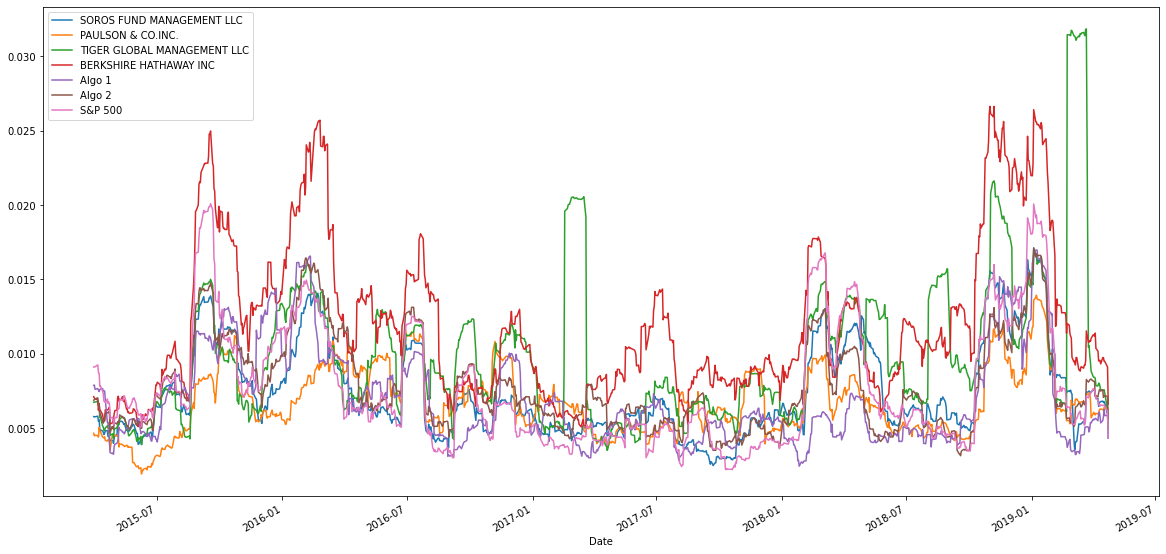

In [25]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
combined.rolling(window = 21).std().plot(figsize = (20,10))

In [26]:
# Construct a correlation table
# YOUR CODE HERE
cor = combined.corr()
cor

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
S&P 500                                         0.623946   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
S&P 500                                    0.751371  0.279494  0.858764   

                              S&P 500  
SOROS FUND MANAGEMENT LLC    0.837864  
PAULSON & CO.INC.            0.669732  
TIGER GLOBAL MANAGEMENT LLC  0.623946  
BERKSHIRE HATHAWAY INC       0.751371  
Algo 1                       0.279494  
Algo 2                       0.858764  
S&P 500                      1.000000

In [27]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE
# beta = covarriance / varriance

covariance1 = combined['SOROS FUND MANAGEMENT LLC'].rolling(window = 21).cov(combined['S&P 500'])

# why is there a space afterwards??????
covariance2 = combined['PAULSON & CO.INC. '].rolling(window = 21).cov(combined['S&P 500'])

covariance3 = combined['TIGER GLOBAL MANAGEMENT LLC'].rolling(window = 21).cov(combined['S&P 500'])
covariance4 = combined['BERKSHIRE HATHAWAY INC'].rolling(window = 21).cov(combined['S&P 500'])
covariance5 = combined['Algo 1'].rolling(window = 21).cov(combined['S&P 500'])
covariance6 = combined['Algo 2'].rolling(window = 21).cov(combined['S&P 500'])
covariance7 = combined['S&P 500'].rolling(window = 21).cov(combined['S&P 500'])

covariance4

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000053
2019-04-17    0.000053
2019-04-18    0.000053
2019-04-22    0.000047
2019-04-23    0.000020
Length: 1043, dtype: float64

In [28]:
var = combined['S&P 500'].rolling(window = 21).var()
var

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    0.000042
2019-04-17    0.000043
2019-04-18    0.000042
2019-04-22    0.000037
2019-04-23    0.000019
Name: S&P 500, Length: 1043, dtype: float64

In [29]:
beta1 = covariance1 / var
beta2 = covariance2 / var
beta3 = covariance3 / var
beta4 = covariance4 / var
beta5 = covariance5 / var
beta6 = covariance6 / var
beta7 = covariance7 / var

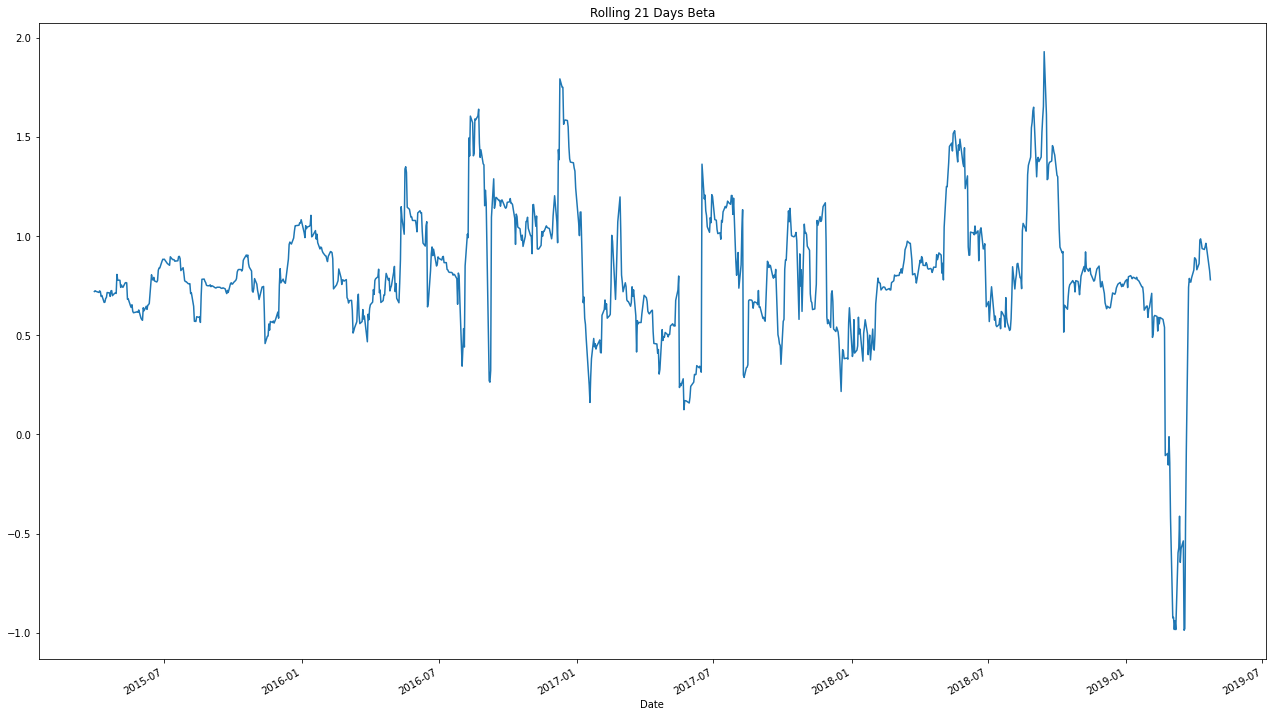

In [32]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

a = beta3.plot(figsize = (22,13), title = "Rolling 21 Days Beta")

# Did beta for all, but hashed it out.
# beta2.plot(ax=a)
# beta3.plot(ax=a)
# beta4.plot(ax=a)
# beta5.plot(ax=a)
# beta6.plot(ax=a)

# # pretty much a straight line
# beta7.plot(ax=a)

# a.legend(["Soros Fund Management LLC Beta", "PAULSON & CO.INC. Beta", "Tiger Global Management LLC Beta", "Berkshire Hathaway INC. Beta", "Algo 1 Beta", "Algo 2 Beta", "S&P 500 Beta"])

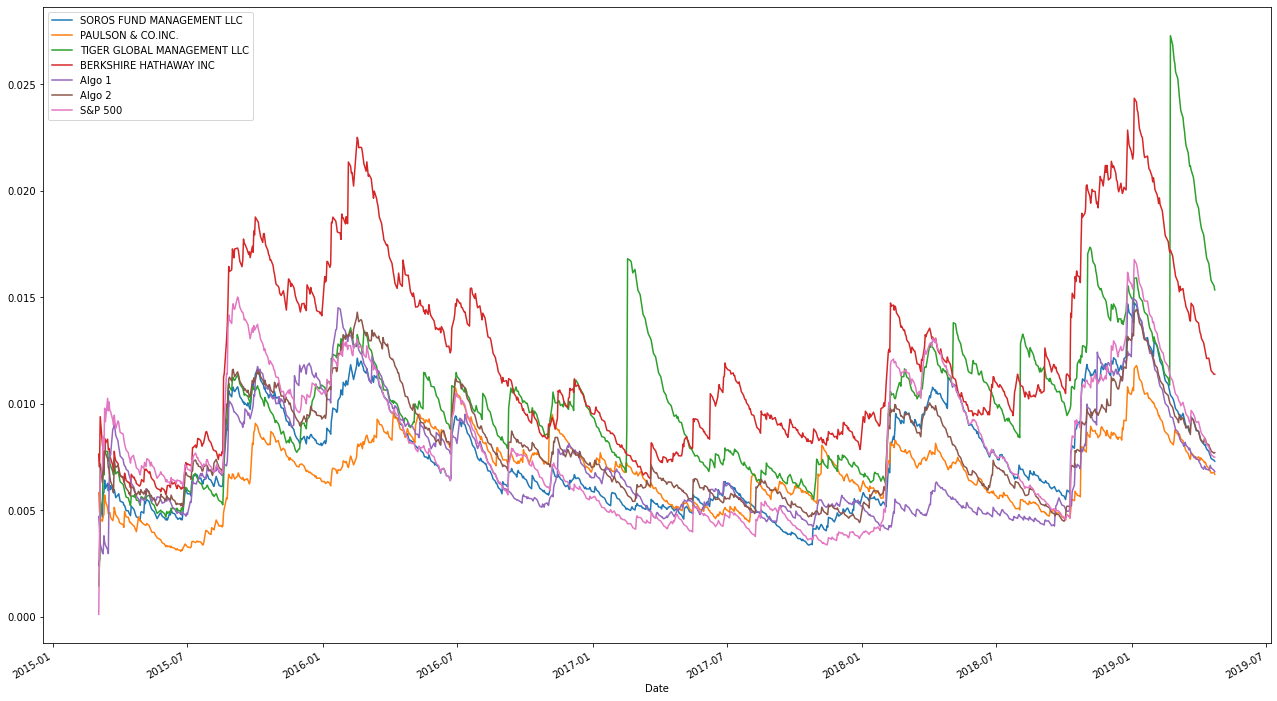

In [193]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

# combined.pd.ewma(min_periods = 21).mean().plot(figsize = (20,10))

combined.ewm(halflife=21).std().plot(figsize=(22,13))


In [194]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
# sharpe = (average * 252) / (std * sqrt252)
sharpe_ratios = (combined.mean() * 252) / (combined.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

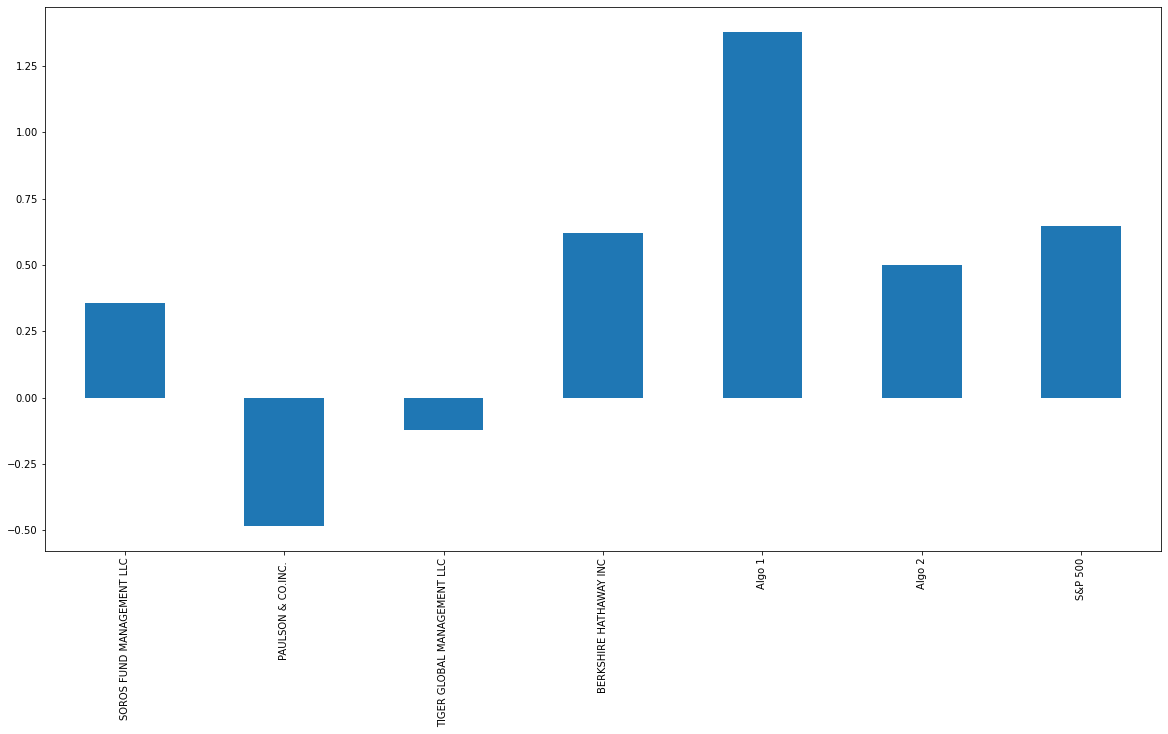

In [195]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

sharpe_ratios.plot.bar(figsize = (20,10))

In [196]:
# Read the first stock
# YOUR CODE HERE


# had a google finance sheet with all stocks on it, but changed the "close" into the respective symbol. Didn't want to manually add in the symbols for each line. Will if needed.
mines_path = Path("Resources/portfolio.csv")
my = pd.read_csv(mines_path, index_col = "Date", infer_datetime_format = True, parse_dates = True)
my.drop(columns = ["Date.1", "Date.2", "Date.3"], inplace = True)
my.tail()

AMZN     BP     DIS  NYMT
Date                                    
2019-12-23  1793.00  38.11  144.68  6.20
2019-12-24  1789.21  38.04  145.29  6.24
2019-12-26  1868.77  37.98  145.70  6.27
2019-12-27  1869.80  37.86  145.75  6.26
2019-12-30  1846.89  37.60  143.77  6.22

In [197]:
# calculating the pct change to make my portfolio match the others. 
# This wasn't a step in the whales_analysis.ipynb. 
# Caused me a bit of confusion cause my portfolio was outperforming everything by a huge margin.
# Then realized forgot the pct_change 
my_pct = my.pct_change()
my_pct.tail()

AMZN        BP       DIS      NYMT
Date                                              
2019-12-23  0.003638  0.006869 -0.014978 -0.009585
2019-12-24 -0.002114 -0.001837  0.004216  0.006452
2019-12-26  0.044467 -0.001577  0.002822  0.004808
2019-12-27  0.000551 -0.003160  0.000343 -0.001595
2019-12-30 -0.012253 -0.006867 -0.013585 -0.006390

In [198]:
# Calculate weighted portfolio returns
# weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
weights = [.25, .25, .25, .25]
my_returns = my_pct.dot(weights)


In [199]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
combined_mines = pd.concat([combined, my_returns], axis = "columns", join = "inner" ).dropna()
combined_mines

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2   S&P 500         0  
Date                                      
2015-03-03 -0.000949 -0.004539  0.002751  
2015-03-04  0.002416 -0.004389 -0.002091  
2015-03-05  0.004323  0.001196 -0.000048  
2015-03-06 -0.011460 -0.014174 -0.016696  
2015-03-09  0.001303  0.003944  0.003310  
...              ...       ...       ...  
2019-04-16  0.002899  0.000509  0.000211  
2019-04-17 -0.005228 -0.002274  0.004586  
2019-04-18 -0.001229  0.001579  0.000025  
2019-04-22 -0.001936  0.001012  0.006052  
2019-04-23  0.009622  0.008841  0.010328  

[1043 rows x 8 columns]

In [200]:
combined_mines.rename(columns = {0: "The Best"},inplace = True )

In [201]:
combined_mines

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2   S&P 500  The Best  
Date                                      
2015-03-03 -0.000949 -0.004539  0.002751  
2015-03-04  0.002416 -0.004389 -0.002091  
2015-03-05  0.004323  0.001196 -0.000048  
2015-03-06 -0.011460 -0.014174 -0.016696  
2015-03-09  0.001303  0.003944  0.003310  
...              ...       ...       ...  
2019-04-16  0.002899  0.000509  0.000211  
2019-04-17 -0.005228 -0.002274  0.004586  
2019-04-18 -0.001229  0.001579  0.000025  
2019-04-22 -0.001936  0.001012  0.006052  
2019-04-23  0.009622  0.008841  0.010328  

[1043 rows x 8 columns]

# RERUN EVERYTHING AGAIN

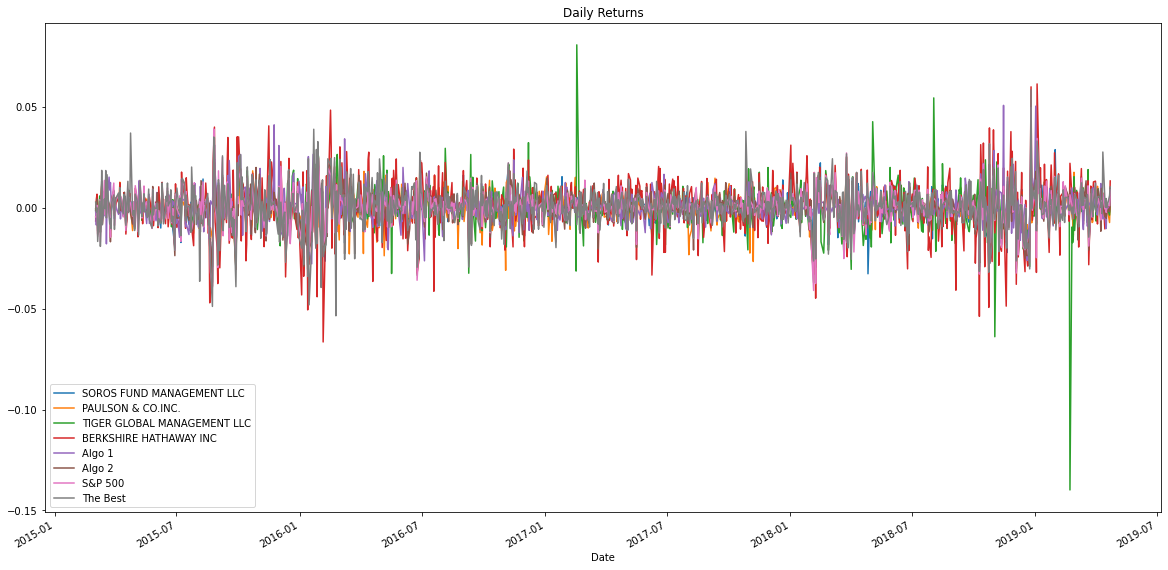

In [203]:
# Risk
# YOUR CODE HERE
combined_mines.plot(figsize = (20,10), title = "Daily Returns")

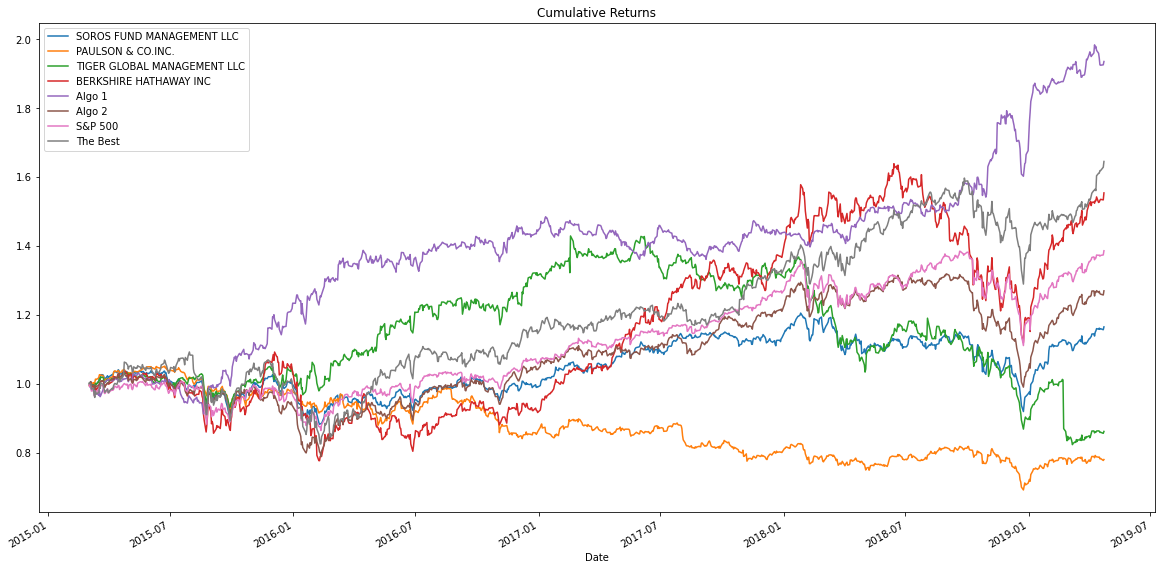

In [138]:

cumulative_returns_mines = (1 + combined_mines).cumprod()
cumulative_returns_mines.plot(figsize = (20,10), title = "Cumulative Returns")

In [204]:
# Risk
# YOUR CODE HERE
volatility_mines = combined_mines.std() * np.sqrt(252)
volatility_mines.sort_values()

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
The Best                       0.166318
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

In [147]:
volatility_mines

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
The Best                       0.166318
dtype: float64

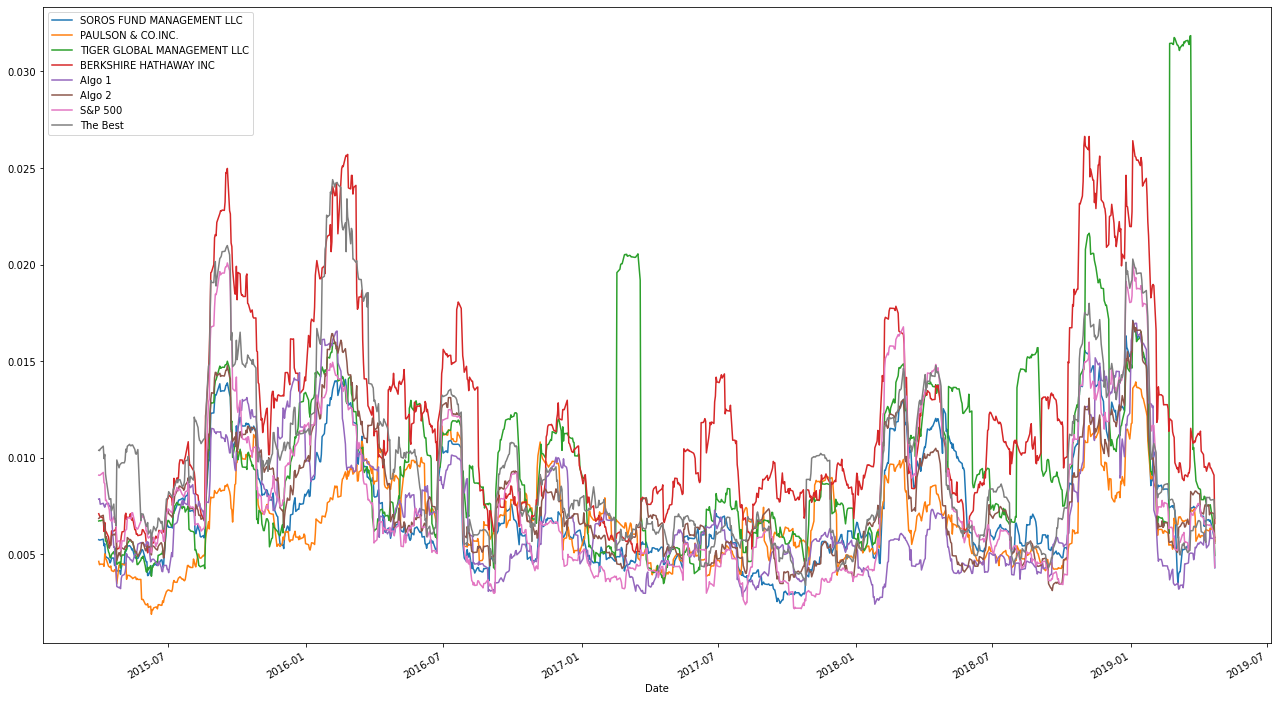

In [205]:
# Rolling
# YOUR CODE HERE
combined_mines.rolling(window = 21).std().plot(figsize = (22,13), legend = "21 Days Rolling Standard Deviation")

In [206]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE
# sharpe = (average * 252) / (std * sqrt252)
sharpe_ratios_mines = (combined_mines.mean() * 252) / (combined_mines.std() * np.sqrt(252))
sharpe_ratios_mines

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
The Best                       0.806100
dtype: float64

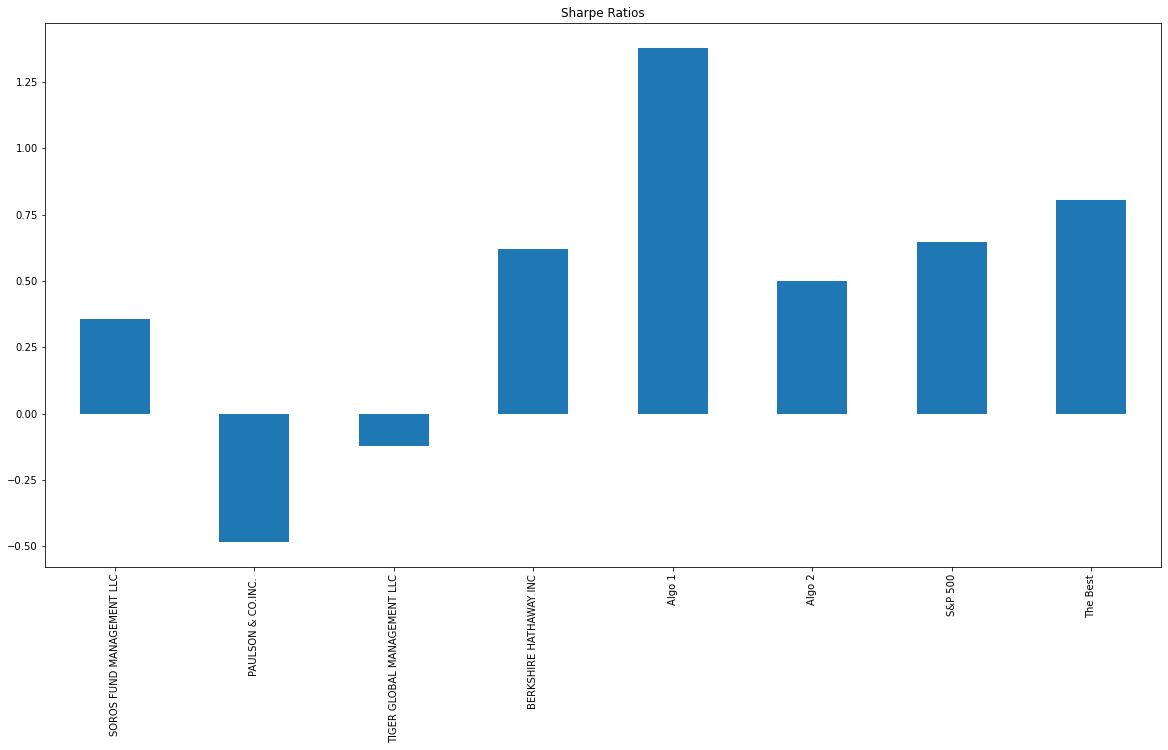

In [209]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios_mines.plot.bar(figsize = (20,10), title = "Sharpe Ratios")

In [212]:
# Create a correlation analysis
# YOUR CODE HERE
cor_mines = combined_mines.corr()

In [213]:
cor_mines

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   
The Best                                      0.708707            0.533179   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2                                          0.507414   
S&P 500                                         0.623946   
The Best                                        0.487294   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
SOROS FUND MANAGEMENT LLC                  0.754360  0.321211  0.826873   
PAULSON & CO.INC.                          0.545623  0.268840  0.678152   
TIGER GLOBAL MANAGEMENT LLC                0.424423  0.164387  0.507414   
BERKSHIRE HATHAWAY INC                     1.000000  0.292033  0.688082   
Algo 1                                     0.292033  1.000000  0.288243   
Algo 2                                     0.688082  0.288243  1.000000   
S&P 500                                    0.751371  0.279494  0.858764   
The Best                                   0.627962  0.308410  0.736699   

                              S&P 500  The Best  
SOROS FUND MANAGEMENT LLC    0.837864  0.708707  
PAULSON & CO.INC.            0.669732  0.533179  
TIGER GLOBAL MANAGEMENT LLC  0.623946  0.487294  
BERKSHIRE HATHAWAY INC       0.751371  0.627962  
Algo 1                       0.279494  0.308410  
Algo 2                       0.858764  0.736699  
S&P 500                      1.000000  0.782531  
The Best                     0.782531  1.000000

In [214]:
# Beta
# YOUR CODE HERE
# beta = cov / var
covariance8 = combined_mines['The Best'].rolling(window = 21).cov(combined_mines['S&P 500'])
var_mines = combined_mines['S&P 500'].rolling(window = 21).var()

beta_mines = covariance8 / var_mines


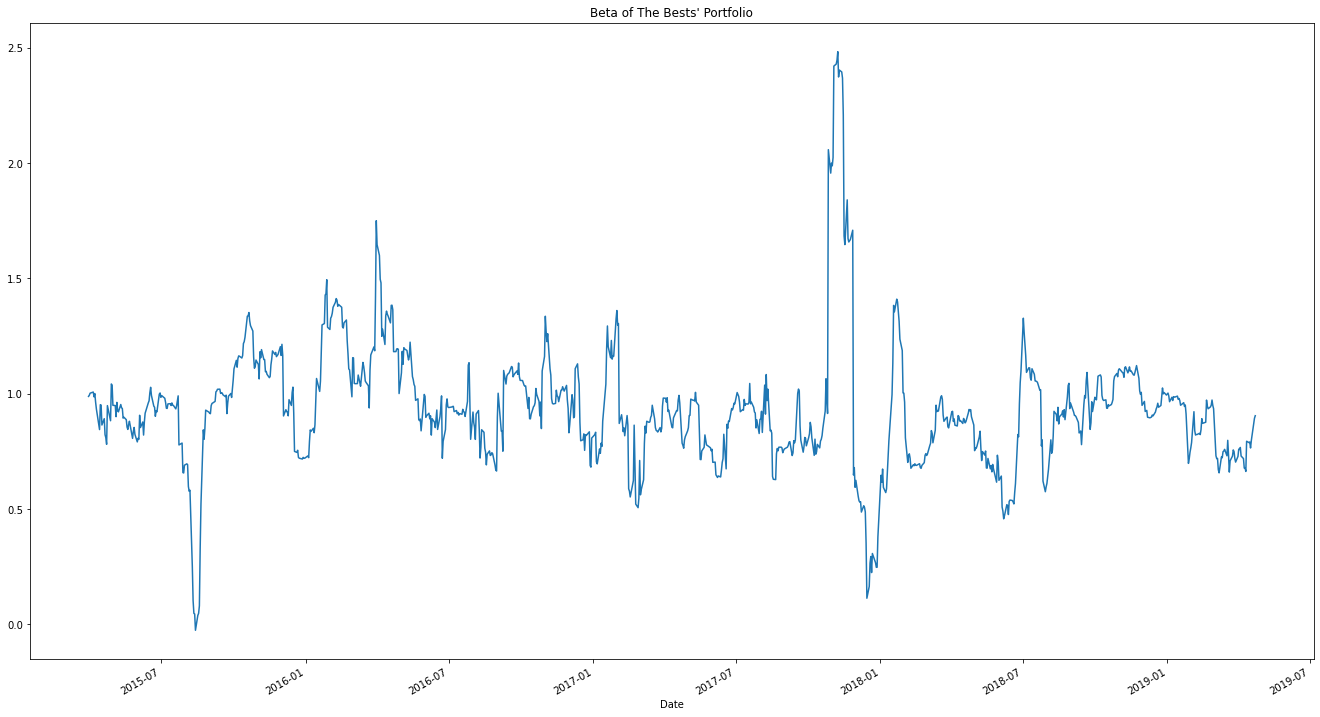

In [216]:
beta_mines.plot(figsize = (23,13), title = "Beta of The Bests' Portfolio")